Hand-In of Group 13, Jonathan Ehrengruber (jonathan.ehrengruber@students.fhnw.ch), Christian Renold (christian.renold@hslu.ch)

## MLP with TensorFlow 2.0
The objective of the exercise is to implement computational graphs in TensorFlow 2.0 to train and use such an architecture. The constraints we put ourselves is to use **low-level** functions of TensorFlow, i.e. we will not use high-level functions to compose layers and to train the parameters.

If you get this error in the execution of the first cell: ` ModuleNotFoundError: No module named 'tensorflow' `, it probably means TensorFlow 2.0 is not installed yet on your machine.

In [4]:
#############################
# MNIST Dataset Preparation #
#############################

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist
(x_train, y_train_vec),(x_test, y_test_vec) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train_vec, 10, dtype='float64')
y_test = tf.keras.utils.to_categorical(y_test_vec, 10, dtype='float64')
N = x_train.shape[0]         # number of samples
D = x_train.shape[1]         # dimension of input sample
n_classes = y_train.shape[1] # output dim
print('MNIST data set ready. N={}, D={}, n_classes={}'.format(N,D,n_classes))

# Setting tf device
tf_device = '/CPU:0'

MNIST data set ready. N=60000, D=784, n_classes=10


In [5]:
# Function to sample a random batch from dataset
def next_batch(num, data, labels):
    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = np.arange(0,len(data))  # create an array of index values
    np.random.shuffle(idx)        # shuffle it
    idx = idx[:num]               # take the first n indexes = size of batch
    data_shuffle = data[idx]      # extract the batch using the random indexes
    labels_shuffle = labels[idx]  # extract the labels using the random indexes

    return data_shuffle, labels_shuffle

In [25]:
##################
# Training phase #
##################

E = 200                # number of epochs
B = 128               # batch size
N = x_train.shape[0]  # number of samples
D = x_train.shape[1]  # dimension of input sample
H = 300               # number of neurons
A = 0.01              # learning rate alpha

In [26]:
##############################################
#  COMPLETE CODE BELOW WHERE YOU SEE # ...   #
##############################################

# Build the computational graph
@tf.function # this decorator tells tf that a graph is defined
def mlp_train(x, y, alpha):
    # define nodes for forward computation for hidden neurons h and output neurons y_pred
    h = tf.nn.relu(tf.matmul(x, w1) + b1) # output of first layer after ReLu activation
    y_pred = tf.nn.sigmoid(tf.matmul(h, w2) + b2) # output of second layer after sigmoid activation
    # define nodes for forward computation for hidden neurons h and output neurons y_pred
    diff = y_pred - y
    loss = tf.reduce_mean(tf.pow(diff, 2))
    # define the gradients
    grad_w1, grad_b1, grad_w2, grad_b2 = tf.gradients(ys=loss, xs=[w1, b1, w2, b2])
    # compute the new values of the gradients with the assign method (see slides)
    w1.assign(w1 - alpha * grad_w1)
    b1.assign(b1 - alpha * grad_b1)
    w2.assign(w2 - alpha * grad_w2)
    b2.assign(b2 - alpha * grad_b2)
    return y_pred, loss

# Init the tf.Variablesw 1, b1, w2, b2 following the given examples
w1 = tf.Variable(tf.random.truncated_normal((D, H), stddev = 0.1, dtype='float64'))
b1 = tf.Variable(tf.constant(0.0, shape=[H], dtype='float64'))
w2 = tf.Variable(tf.random.truncated_normal((H, 10), stddev = 0.1, dtype='float64'))
b2 = tf.Variable(tf.constant(0.0, shape=[10], dtype='float64'))

# Run the computational graph
J = [] # to store the evolution of loss J for each epoch
for epoch in range(E):
    J_epoch = 0.0
    for _ in range(int(N/B)): # number of batches to visit for 1 epoch
        # get batches calling the next_batch method provided above
        x_train_batch, y_train_batch = next_batch(B, x_train, y_train)
        with tf.device(tf_device):  # change to /GPU:0 to move it to GPU
            # call the graph with the batched input, target and alpha A
            out = mlp_train(x_train_batch, y_train_batch, A)
        y_pred, loss_val = out
        J_epoch += loss_val
    J.append(J_epoch)
    print("epoch = {}, loss = {}".format(epoch, J_epoch))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
epoch = 0, loss = 54.456618685203374
epoch = 1, loss = 41.197882928272804
epoch = 2, loss = 38.7242224188646
epoch = 3, loss = 36.7571036666097
epoch = 4, loss = 34.89373648211526
epoch = 5, loss = 33.16219666779835
epoch = 6, loss = 31.484054749084706
epoch = 7, loss = 29.914869782804942
epoch = 8, loss = 28.278028597256263
epoch = 9, loss = 26.882264750738504
epoch = 10, loss = 25.609874445483175
epoch = 11, loss = 24.43080712097517
epoch = 12, loss = 23.242509375902976
epoch = 13, loss = 22.348807595822585
epoch = 14, loss = 21.58433155636921
epoch = 15, loss = 20.78327586106281
epoch = 16, loss = 20.101547855719083
epoch = 17, loss = 19.694588894980555
epoch = 18, loss = 19.06622198301705
epoch = 19, loss = 18.4177405143476
epoch = 20, loss = 18.012538301834063
epoch = 21, loss = 17.5578886447922
epoch = 22, loss = 17.098225563818286
epoch = 23, loss = 16.949190806725777
epoch = 24, loss =

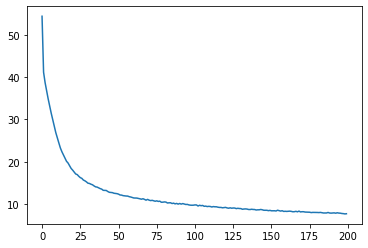

In [27]:
# Plot the evolution of the loss
plt.plot(J)

In [28]:
#################
# Testing phase #
#################

N = x_test.shape[0]  # number of samples
D = x_test.shape[1]  # dimension of input sample

##############################################
#  COMPLETE CODE BELOW WHERE YOU SEE # ...   #
##############################################
# Build the computational graph
@tf.function # this decorator tells tf that a graph is defined
def mlp_test(x, y):
    h = tf.nn.relu(tf.matmul(x, w1) + b1)
    y_pred = tf.nn.sigmoid(tf.matmul(h, w2) + b2)
    return y_pred

# Run the computational graph
with tf.device(tf_device):  # change to /GPU:0 to move it to GPU
    y_pred_test = mlp_test(x_test, y_test)

print('Forward pass on test set done.')
# At this stage, y_pred_test should contain the matrix of outputs on the test set with shape (N_test, 10)

Forward pass on test set done.


In [29]:
# compute accuracy
y_winner = np.argmax(y_pred_test, axis=1)
N_test = y_winner.size
num_correct = (y_winner == y_test_vec).sum()
num_missed = N_test - num_correct
accuracy = num_correct * 1.0 / N_test
error_rate = num_missed * 1.0 / N_test
print('# samples  : ', N_test)
print('# correct  : ', num_correct)
print('# missed   : ', num_missed)
print('accuracy   :  %2.2f %%'% (accuracy*100.0))
print('error rate :  %2.2f %%'% (error_rate*100.0))

# samples  :  10000
# correct  :  9201
# missed   :  799
accuracy   :  92.01 %
error rate :  7.99 %


## Keras section

In [9]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import SGD

In [10]:
model = Sequential([
    Dense(10, input_shape=(D,), use_bias=True, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [11]:
sgd = SGD(learning_rate=.5)
model.compile(
    optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy']
)

In [12]:
history = model.fit(x_train, y_train, epochs=200)

Train on 60000 samples
Epoch 1/200
60000/60000 [==============================] - 2s 41us/sample - loss: 0.3771 - accuracy: 0.8906
Epoch 2/200
60000/60000 [==============================] - 2s 34us/sample - loss: 0.3205 - accuracy: 0.9097
Epoch 3/200
60000/60000 [==============================] - 2s 34us/sample - loss: 0.3092 - accuracy: 0.9133
Epoch 4/200
60000/60000 [==============================] - 2s 34us/sample - loss: 0.3020 - accuracy: 0.9148
Epoch 5/200
60000/60000 [==============================] - 2s 34us/sample - loss: 0.2976 - accuracy: 0.9163
Epoch 6/200
60000/60000 [==============================] - 2s 35us/sample - loss: 0.2930 - accuracy: 0.9187
Epoch 7/200
60000/60000 [==============================] - 2s 34us/sample - loss: 0.2923 - accuracy: 0.9188
Epoch 8/200
60000/60000 [==============================] - 2s 34us/sample - loss: 0.2911 - accuracy: 0.9181
Epoch 9/200
60000/60000 [==============================] - 2s 35us/sample - loss: 0.2884 - accuracy: 0.9204
Epoch

60000/60000 [==============================] - 2s 35us/sample - loss: 0.2652 - accuracy: 0.9260
Epoch 76/200
60000/60000 [==============================] - 2s 34us/sample - loss: 0.2653 - accuracy: 0.9255
Epoch 77/200
60000/60000 [==============================] - 2s 34us/sample - loss: 0.2647 - accuracy: 0.9255
Epoch 78/200
60000/60000 [==============================] - 2s 34us/sample - loss: 0.2659 - accuracy: 0.9255
Epoch 79/200
60000/60000 [==============================] - 2s 34us/sample - loss: 0.2644 - accuracy: 0.9264
Epoch 80/200
60000/60000 [==============================] - 2s 34us/sample - loss: 0.2650 - accuracy: 0.9254
Epoch 81/200
60000/60000 [==============================] - 2s 34us/sample - loss: 0.2658 - accuracy: 0.9251
Epoch 82/200
60000/60000 [==============================] - 2s 35us/sample - loss: 0.2653 - accuracy: 0.9257
Epoch 83/200
60000/60000 [==============================] - 2s 34us/sample - loss: 0.2640 - accuracy: 0.9268
Epoch 84/200
60000/60000 [======

60000/60000 [==============================] - 2s 35us/sample - loss: 0.2593 - accuracy: 0.9264
Epoch 150/200
60000/60000 [==============================] - 2s 34us/sample - loss: 0.2611 - accuracy: 0.9270
Epoch 151/200
60000/60000 [==============================] - 2s 34us/sample - loss: 0.2599 - accuracy: 0.9268
Epoch 152/200
60000/60000 [==============================] - 2s 34us/sample - loss: 0.2605 - accuracy: 0.9263
Epoch 153/200
60000/60000 [==============================] - 2s 34us/sample - loss: 0.2617 - accuracy: 0.9273
Epoch 154/200
60000/60000 [==============================] - 2s 34us/sample - loss: 0.2595 - accuracy: 0.9269
Epoch 155/200
60000/60000 [==============================] - 2s 34us/sample - loss: 0.2578 - accuracy: 0.9272
Epoch 156/200
60000/60000 [==============================] - 2s 34us/sample - loss: 0.2599 - accuracy: 0.9273
Epoch 157/200
60000/60000 [==============================] - 2s 34us/sample - loss: 0.2616 - accuracy: 0.9273
Epoch 158/200
60000/6000

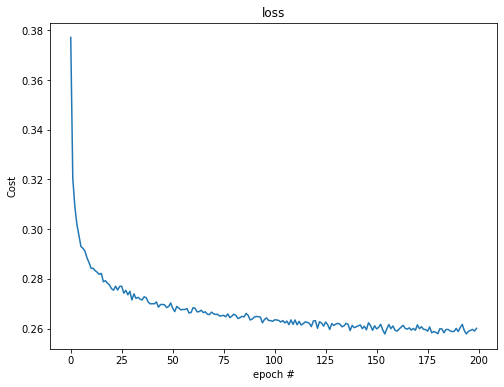

In [34]:
fig, ax = plt.subplots(figsize=(8, 6))
_ = ax.plot(history.history['loss'])
_ = ax.set_title('loss')
_ = ax.set_xlabel('epoch #')
_ = ax.set_ylabel('Cost')

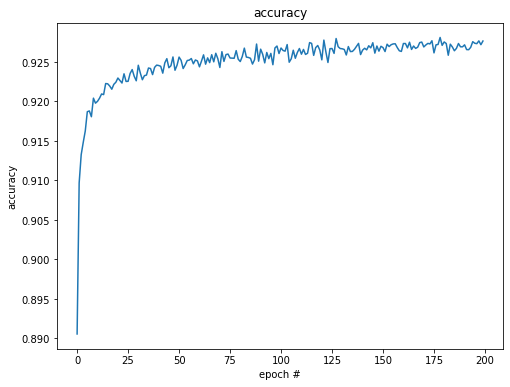

In [36]:
fig, ax = plt.subplots(figsize=(8, 6))
_ = ax.plot(history.history['accuracy'])
_ = ax.set_title('accuracy')
_ = ax.set_xlabel('epoch #')
_ = ax.set_ylabel('accuracy')

In [37]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=False)
print(accuracy)

0.9155


### Comment
What we can observe here is that the cost function value is somewhat similar to the one received at Exercise 3. The error also seems to be something $> 10^{-1}$ so we have quiet similar results. This means that we are more flexible for creating a model but however similar in performance (Disregarding the batchsize).